# Project_LETTER, Zachariah Gutierrez

## Dataset information

Name: Letter <br>
Data Type: Multivariate <br>
Default Task: Classification <br>
Attribute Types: integer <br>
No. Instances: 20000 <br>
No. Attributes: 16 <br>
Year: 1991 <br>
Task: Identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

## Imports and functions

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    from sklearn.ensemble import RandomForestClassifier

In [3]:
# heatmap for LinearSVC
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

# heatmap for K-NearestNeighbors
def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
# heatmap for RandomForest
def draw_heatmap_rf(acc, acc_desc, p_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=p_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$params$')
    plt.title(acc_desc + ' w.r.t $params$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## Load and transform the data

In [4]:
# import the data and set the column names
X_and_y = pd.read_csv('letter-recognition.data.txt', header=None)
X_and_y.rename(columns={0:'letter'}, inplace=True
              )
print('Shape of original data is:', X_and_y.shape)

# shuffle the data then split X and y
X_and_y = X_and_y.sample(frac=1).reset_index(drop=True)
X = X_and_y.iloc[:,1:17]
y = X_and_y.iloc[0:20000,0]       # note: .iloc[:,0] raised a warning

Shape of original data is: (20000, 17)


In [5]:
# inspect the data
X_and_y.head()    # note: first column is response variable

,letter,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,J,1,1,1,1,0,12,3,6,4,13,4,11,0,7,0,8
1,R,3,7,3,5,2,6,9,9,5,7,5,8,3,8,5,10
2,U,4,2,5,3,2,6,8,5,8,7,10,9,3,9,1,8
3,Y,2,7,3,5,2,5,10,2,2,8,12,8,1,11,0,8
4,P,3,10,4,8,4,4,12,7,2,10,7,4,1,10,3,8


In [6]:
## "LETTER.p2 uses letters A-M as positives
##  and the rest as negatives, yielding a 
##  well-balanced problem."

for i in range(len(y)):
    if y[i] == 'A':
        y[i] = 1
    elif y[i] == 'B':
        y[i] = 1
    elif y[i] == 'C':
        y[i] = 1    
    elif y[i] == 'D':
        y[i] = 1    
    elif y[i] == 'E':
        y[i] = 1    
    elif y[i] == 'F':
        y[i] = 1
    elif y[i] == 'G':
        y[i] = 1   
    elif y[i] == 'H':
        y[i] = 1   
    elif y[i] == 'I':
        y[i] = 1    
    elif y[i] == 'J':
        y[i] = 1    
    elif y[i] == 'K':
        y[i] = 1    
    elif y[i] == 'L':
        y[i] = 1
    elif y[i] == 'M':
        y[i] = 1  
    else:
        y[i] = 0      

In [7]:
# converts dataframes to np arrays
X = X.values    
y = y.values

In [8]:
# reshape y and change from object type
y = y.reshape(20000,)   # 20000 is original row count 
y = y.astype('int')     # changed this because of an error message

## Train the models (SVM, KNN, & RandomForest)

In [9]:
final_score_svm = []
final_score_knn = []
final_score_rf = []

### Letter 20/80

In [10]:
%%time

## Train every model on three random splits of 20/80

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Letter.data, split=20/80...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (20/80)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27))         
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on Letter.data, split=20/80...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.65337493 0.67468736 0.69899988 0.70712517 0.71449992 0.71987519
 0.64980937 0.60236901 0.5895746  0.58937094 0.58599782]
The SVM testing accuracy is [0.6495  0.6715  0.69525 0.70625 0.713   0.717   0.6405  0.602   0.58625
 0.58575 0.58075]

The KNN training accuracy is [1.         0.97162502 0.97699988 0.96206203 0.96324976 0.95431224
 0.95312478 0.94550003 0.94312543 0.93650005 0.93462527 0.92906224
 0.92443714 0.91943763 0.91681247 0.91037493 0.9100624  0.90493761
 0.90187458 0.89606269 0.89368763 0.89024995 0.88762521 0.88281273
 0.88181267 0.87593806]
The KNN testing accuracy is [0.938   0.91875 0.93875 0.92625 0.93175 0.9215  0.92425 0.9145  0.91775
 0.91075 0.90925 0.90125 0.9015  0.892   0.89075 0.88275 0.884   0.87625
 0.87625 0.871   0.87075 0.86225 0.86425 0.86075 0.86175 0.85

The avg test scores for 20/80:
SVM: 0.6592575757575758
KNN: 0.8966955128205127
RF: 0.8051944444444444


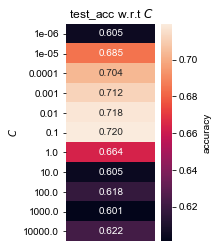

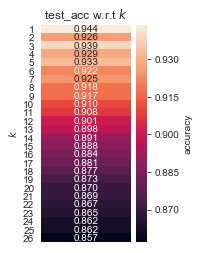

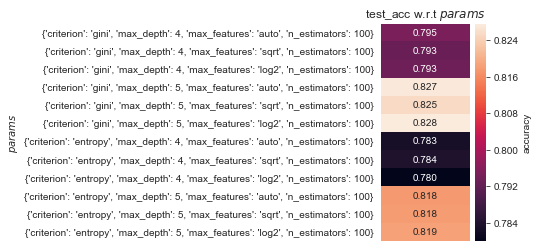

In [11]:
## Plot the heatmaps

print('The avg test scores for 20/80:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg2080 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

In [12]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Letter is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Letter is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Letter are', R_prime)

Best C for SVM on Letter is: 0.1
Best K for KNN on Letter is: 1
Best RandomForest parameters for Letter are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [13]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Letter.data, 20/80 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For Letter.data, 20/80 split...
Test score for SVM is: 0.7214375
Test score for KNN is: 0.9530625
Test score for RF is: 0.8161875


### Letter 50/50

In [14]:
%%time

## Train every model on three random splits of 50/50

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Letter.data, split=50/50...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (50/50)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27))
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on Letter.data, split=50/50...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.67532494 0.69837493 0.71019997 0.71909997 0.72627501 0.72702506
 0.67344814 0.58347997 0.66557152 0.65807376 0.64709473]
The SVM testing accuracy is [0.6733 0.6962 0.712  0.7185 0.7244 0.7252 0.6739 0.5802 0.6623 0.6594
 0.6494]


IndexError: index 69792 is out of bounds for axis 0 with size 7999

In [15]:
## Plot the heatmaps

print('The avg test scores for 50/50:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg5050 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

The avg test scores for 50/50:
SVM: 0.3397636363636364
KNN: 0.0
RF: 0.0


ValueError: cannot reshape array of size 22 into shape (11,1)

In [ ]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Letter is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Letter is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Letter are', R_prime)

In [ ]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Letter.data, 50/50 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

### Letter 80/20

In [ ]:
%%time

## Train every model on three random splits of 80/20

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on Letter.data, split=80/20...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27)) 
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

In [ ]:
## Plot the heatmaps

print('The avg test scores for 80/20:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg8020 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

In [ ]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on Letter is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on Letter is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for Letter are', R_prime)

In [ ]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For Letter.data, 80/20 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

## Display the final results

In [ ]:
## Graph the individual split scores

print(avg2080, avg5050, avg8020)

objects = ('20/80', '50/50', '80/20')
y_pos = np.arange(len(objects))
performance = [avg2080, avg5050, avg8020]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Split Results for Letter.data')
plt.show()

In [ ]:
## Calculate average test scores for all splits

print('For Letter.data, the final test scores are:')
print('SVM:', np.mean(final_score_svm))
print('KNN:', np.mean(final_score_knn))
print('RF:', np.mean(final_score_rf))

In [ ]:
## Graph the final test scores

objects = ('SVM', 'KNN', 'RandomForests')
y_pos = np.arange(len(objects))
performance = [np.mean(final_score_svm), np.mean(final_score_knn), np.mean(final_score_rf)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Final Results for Letter.data')
plt.show()

# End